## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [216]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [357]:
#READING THE FILE
df= pd.read_csv('ab_data.csv')
#lOOKING AT THE HEAD
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [218]:
#LOOKING AT THE SHAPE
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [219]:
#lOOKS FOR THE NUMBER OF UNIQUE USERS
df.user_id.nunique()

290584

d. The proportion of users converted.

In [220]:
#CALCULATES THE MEAN OF CONVERTED VALUE = PROPORTION
df['converted'].mean()


0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [227]:
#CALCULATES THE NUMBER OF MISMATCHING VALUES UTILIZING .GROUPBY FUNCTIONS
(df.groupby([df['group']=='treatment', df['landing_page']=='old_page']).size().reset_index()[0].iloc[0])+(df.groupby([df['group']=='control',df['landing_page']=='new_page']).size().reset_index()[0].iloc[0])

3893

f. Do any of the rows have missing values?

In [127]:
#eVALUATES THE DATA SET WITH .INFO FUNCTION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [358]:
#CREATES THE NEW CLEANED DF2 BY CONCATINATING THE QUERIED VALUES FROM THE MAIN DATA SET
df2=pd.concat([df[(df['group']=='treatment') & (df['landing_page']=='new_page')],df[(df['group']=='control') & (df['landing_page']=='old_page')]])

In [274]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [275]:
#CHECKING THE SHAPE
df2.shape

(290585, 5)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [276]:
#CHECKING THE UNIQUE USERS
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [278]:
#GETTING THE NON UNIQUE USER INFO
df2[df2.duplicated('user_id')]['user_id'].iloc[0]

773192

c. What is the row information for the repeat **user_id**? 

In [280]:
#GETTING THE NON UNIQUE USER INFO
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [281]:
#REMOVES NON UNIQUE USERS AND KEEPING AT LEAST ONE ROW WITH THIS USER
df2.drop_duplicates('user_id', keep='first', inplace=True)

#CHECK TO CONFIRM IF THERE IS ANY DUPLICATES LEFT
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [282]:
#CALCULATES THE MEAN OF CONVERTED VALUE = PROPORTION
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [285]:
#CALCULATES THE PROPORTION of converted users within the control group reading old_page
df2.groupby([df2['group']=='control',df2['converted']==1]).size().reset_index()[0].iloc[3]/df2.query('landing_page == "old_page"').user_id.nunique()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [287]:
#CALCULATES THE PROPORTION of converted users within the treated group reading new_page
df2.groupby([df2['group']=='treatment',df2['converted']==1]).size().reset_index()[0].iloc[3]/df2.query('landing_page == "new_page"').user_id.nunique()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [294]:
#CALCULATES THE PROBABILITY OF GETTING A NEW PAGE 
df2.groupby(df2['landing_page']=='new_page').size().reset_index()[0].iloc[1]/df2['landing_page'].count()

0.50006194422266881

In [295]:
#CALCULATES THE PROBABILITY OF GETTING A OLD PAGE 
df2.groupby(df2['landing_page']=='old_page').size().reset_index()[0].iloc[1]/df2['landing_page'].count()

0.49993805577733119

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**It seems that old_page is having more conversions with 12.04% of users having been converted,comparatively to 11.88% in treatment group. Though these numbers are uncignificant to tell the solid difference.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$** : **$p_{old/conv}$** >= **$p_{new/conv}$**

**$H_{1}$** : **$p_{old/conv}$** < **$p_{new/conv}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [301]:
#P-New
p_new=df2.query('converted == 1').user_id.nunique()/df2['converted'].count()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [302]:
#P-New
p_old=df2.query('converted == 1').user_id.nunique()/df2['converted'].count()
p_old

0.11959708724499628

In [303]:
#Calculates the difference between two probabilities
obs_diff = p_new-p_old
obs_diff

0.0

c. What is $n_{new}$?

In [304]:
#Calculates number of users with new_page
n_new=df2.query('landing_page == "new_page"').user_id.nunique()
n_new

145310

d. What is $n_{old}$?

In [305]:
#Calculates number of users with old_page
n_old=df2.query('landing_page == "old_page"').user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [398]:
#Simulates Nnew with Pnew using np.random.binomial function and stores the values in variable new_page_converted
new_page_converted=np.random.binomial(n_new,p_new)
new_page_converted

17314

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [308]:
#Simulates Nold with Pold using np.random.binomial function and stores the values in variable old_page_converted
old_page_converted=np.random.binomial(n_old,p_old)
old_page_converted

17354

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [309]:
#calculates the difference between conversion rates of the simulated data for the test
new_page_converted/n_new-old_page_converted/n_old

-0.0001809954781997608

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [310]:
#creates the list of differences obtained during 10000 iterations
p_diffs = []
for _ in range(10000):
    new_page_converted=np.random.binomial(n_new,p_new)
    old_page_converted=np.random.binomial(n_old,p_old)
    p_diffs.append(new_page_converted/n_new-old_page_converted/n_old)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

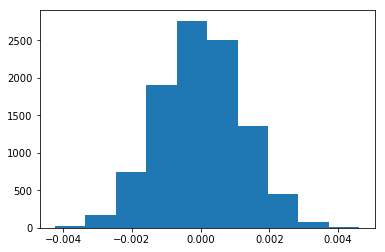

In [311]:
#Plots the data obtained from simulation
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [312]:
#Calculates actual difference between conversion rates
diff_act=df2[df2['group'] == 'treatment']['converted'].mean()-df2[df2['group']=='control']['converted'].mean()
#Calculates p_value
(p_diffs > diff_act).mean()

0.90459999999999996

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This is called a p value, the probability at which we observe our statistic. In addition it gives a clue of how significant the H1 is comparatively to H0. In our test we see that p value is large, hence we can more likely see the data from the H0. We fail to reject the H0  **

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [427]:
import statsmodels.api as sm

#Calculates number of conversions for old page
convert_old = df2.groupby([df2['landing_page']=='old_page',df2['converted']==1]).size().reset_index()[0].iloc[3]
#Calculates number of conversions for new page
convert_new = df2.groupby([df2['landing_page']=='new_page',df2['converted']==1]).size().reset_index()[0].iloc[3]

#Calculates number of users received old page
n_old = df2.query('landing_page == "old_page"').user_id.nunique()
#Calculates number of users received new page
n_new = df2.query('landing_page == "new_page"').user_id.nunique()


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [432]:
## Using stats.proportions_ztest to compute  test statistic and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old,n_new],alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**I've got a bit higher pvalue, thats because it was a two sided test. Overall the answer did not differ significantly from the answers in j and k. Pvalue says that we can expect more then 90% of users to be falling under H0**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**it will be a Logistic regression, since we are dealing with descrete data**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [381]:
## Create 'intercept' column
df2['intercept']=1

## Create 'ab_page' column
df2['ab_page'] = 1

## Assigning  ab_page 0 and 1 to control and treatment groups 
df2['ab_page'][df['group'] =='control'] = 0
df2['ab_page'][df['group'] =='treatment'] = 1

## Checking the result 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 2 to 294476
Data columns (total 7 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
intercept       290585 non-null int64
ab_page         290585 non-null int64
dtypes: int64(4), object(3)
memory usage: 17.7+ MB


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [385]:
## Fitting the logistic model
lm=sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

## Writing to results variable
results=lm.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [386]:
## Looking at results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:               8.085e-06
Time:                        15:10:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? 
Why does it differ from the value you found in the **Part II**?
<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p value is 0.19. As it is a two-sided test it shows the tailed areas shaped other then in  Part II where we had one tail test. And the hypotesis that were tested in this regression are**

**$H_{0}$** : **$p_{old/conv}$** = **$p_{new/conv}$**

**$H_{1}$** : **$p_{old/conv}$** != **$p_{new/conv}$**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**We might end up in situation facing Simpson's paradox. We might be misguided and look at the aggregates of info in this list that will give one result. Though, if we will dig deeper to look at the smaller groups, considering which pages users were more attracted to (for example) we will see the results that are completely different. **

** So, users might be influenced by the country they live in, the culture or their philosophy. One user will like the new page while other won't. Or there could be a novelty effect seen on the treatment group that can not be traced. We always need to make most in depth analysis of those pitfalls that we might face during the study. And of course if we are dealing with more terms in our regression the potential of side effects increases significantly, especially if we can't trace relationship between those additional terms.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [ ]:
# Read 'contries_csv'
countries_df = pd.read_csv('./countries.csv')

##Create dummies for two contries CA and US using UK as a guide
df_new[['CA','US']] = pd.get_dummies(df_new['country'])[['CA','US']]

##Perfofm join to create new df
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [388]:
### Create the necessary dummy variables
df_new[['CA','US']] = pd.get_dummies(df_new['country'])[['CA','US']]

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [390]:
### Fit Your Linear Model And Obtain the Results
lm2=sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'US']])
results=lm2.fit()

## Checking results
results.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:               1.521e-05
Time:                        22:02:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

**Looking at the data we can say that the contry has an impact on the conversion rate. US has the most of the converted users. Though, this might be influenced by the number of users recorded from that country because there are more people interested in the new or old page, but not due to the tested new look of the new page.**

<a id='conclusions'></a>
## Conclusions

**According to the data received and analysed it looks like that the old page has a higher proportion of convertions ~ 12.03  VS. ~11.88 for the new page. Though this difference is not significant to make the decision and hence We fail to reject the H0. This means that result is in favour of old page. **

**From the practical side we would want to run the test longer as we had it running only for 21 daYs as the data that we have now is not practically and statistically significant. Also we need to consider the groups of people that are reading the new/old pages as it might have the influence on the reselt as well. **

In [413]:
## Calculate the timespan of the experiment in DAYS
# Create df3 with the timestamps from df_new
df3 = pd.DataFrame(columns=['to','fr','ans'])

# Calculate starting date
df3.fr = [pd.Timestamp(df_new.timestamp.min())]

# Calculate ending date
df3.to = [pd.Timestamp(df_new.timestamp.max())]

##Get the duration
df3.ans=(df3.to-df3.fr).astype('timedelta64[D]')

##look at the new df3
df3.head()

,to,fr,ans
0,2017-01-24 13:41:54.460509,2017-01-02 13:42:05.378582,21.0


In [415]:
pip install Pandoc

SyntaxError: invalid syntax (<ipython-input-415-059d88206ecf>, line 1)